Load Bike Sharing dataset, perform a linear regression using polyfit degree = 1 and plot result

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
data_df = pd.read_csv('bike-sharing.csv')

In [31]:
x = data_df.temp.values
y = data_df.users.values

# Find linear regression coefs
coef = np.polyfit(x,y,deg=1)
print("Polyfit coefficient:",coef)

Polyfit coefficient: [1495.59624218  -94.61126516]


In [20]:
x_values = np.linspace(min(x),max(x),num=2)
y_values = np.polyval(coef,x_values)

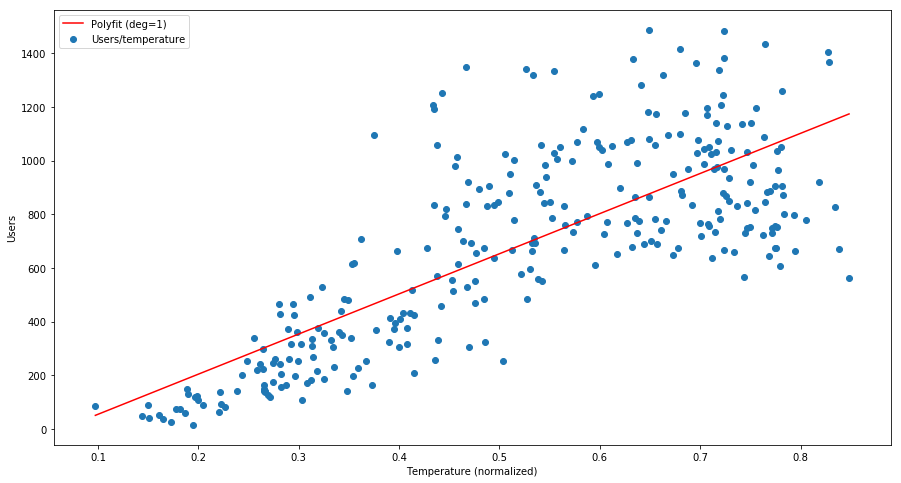

In [21]:
plt.figure(figsize=(15,8))

plt.scatter(x,y,label='Users/temperature')
plt.plot(x_values,y_values,label='Polyfit (deg=1)',c='red')

plt.legend(loc='upper left')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Users')
plt.show()

Now use gadient descent algorythm to minimize the RMSE (Root Mean Square Error) and find the corresponding coefs

In [22]:
# RMSE function
def RMSE(y,y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [36]:
# Gradient descent function
def gradientDescentAlgorythm(a,b,x,y,learning_rate,iterations):
    
    rmse_log = []
    for step in range(iterations):
        
        # Predictions with the current a,b values
        y_pred = a*x + b

        # Compute the error vector
        error = y - y_pred
        rmse_log.append(RMSE(y,y_pred))

        # Partial derivative with respect to a
        a_grad = -2*np.mean(x*error)

        # Partial derivative with respect to b
        b_grad = -2*np.mean(error)

        # Update a and b
        a -= learning_rate*a_grad
        b -= learning_rate*b_grad
        
    return a,b,rmse_log

In [69]:
# use gradient descent function to find out coefs
# here are the starting values
a,b = 0,0
learning_rate = 0.7
iterations = 30

a,b,rmse_log = gradientDescentAlgorythm(a,b,x,y,learning_rate,iterations)
print("30 iterations:",a,b)

# here are the starting values
a,b = 0,0
learning_rate = 0.7
iterations = 400

a2,b2,rmse_log2 = gradientDescentAlgorythm(a,b,x,y,learning_rate,iterations)
print("400 iterations:",a2,b2)

print("Polyfit values:", coef[0],coef[1])

30 iterations: 1133.5584414283558 98.91093635014307
400 iterations: 1495.5961067493747 -94.61119252596914
Polyfit values: 1495.5962421819231 -94.61126515608744


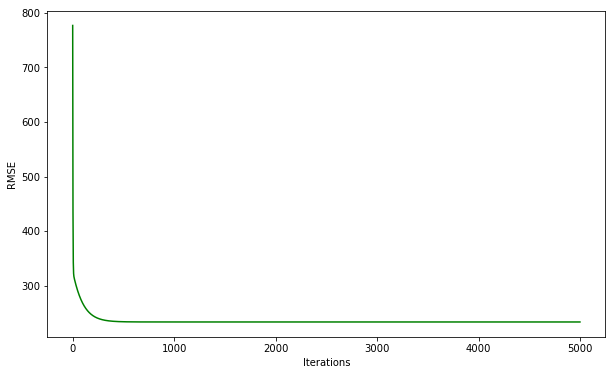

In [66]:
plt.figure(figsize=(10,6))

plt.plot(rmse_log2, c='green')

plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.show()